# Bagging Classifier

### sklearn.ensemble.BaggingClassifier

A Bagging classifier is an ensemble meta-estimator that fits base classifiers each on random subsets of the original dataset and then aggregate their individual predictions (either by voting or by averaging) to form a final prediction. Such a meta-estimator can typically be used as a way to reduce the variance of a black-box estimator (e.g., a decision tree), by introducing randomization into its construction procedure and then making an ensemble out of it.

This algorithm encompasses several works from the literature. When random subsets of the dataset are drawn as random subsets of the samples, then this algorithm is known as Pasting [1]. If samples are drawn with replacement, then the method is known as Bagging [2]. When random subsets of the dataset are drawn as random subsets of the features, then the method is known as Random Subspaces [3]. Finally, when base estimators are built on subsets of both samples and features, then the method is known as Random Patches [4].

Source: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html



In [91]:
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=100, n_features=4,
                            n_informative=2, n_redundant=0,
                            random_state=0, shuffle=False)
clf = BaggingClassifier(base_estimator=SVC(),
                         n_estimators=10, random_state=0).fit(X, y)

clf.predict([[0, 0, 0, 0]])

array([1])

In [96]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

X, y = make_classification(n_samples=300, n_features=10,
                            n_informative=2, n_redundant=0,
                            random_state=0, shuffle=False)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

for i in range(1,21):
    clf = BaggingClassifier(base_estimator=SVC(),
                             n_estimators=i, random_state=0).fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    BaggingAccuracy = metrics.accuracy_score(y_test, y_pred)
    print("Accuracy:",BaggingAccuracy)

Accuracy: 0.9333333333333333
Accuracy: 0.9111111111111111
Accuracy: 0.9111111111111111
Accuracy: 0.8777777777777778
Accuracy: 0.9
Accuracy: 0.8888888888888888
Accuracy: 0.9
Accuracy: 0.8888888888888888
Accuracy: 0.9111111111111111
Accuracy: 0.9111111111111111
Accuracy: 0.9222222222222223
Accuracy: 0.9222222222222223
Accuracy: 0.9222222222222223
Accuracy: 0.9222222222222223
Accuracy: 0.9222222222222223
Accuracy: 0.9111111111111111
Accuracy: 0.9222222222222223
Accuracy: 0.9222222222222223
Accuracy: 0.9222222222222223
Accuracy: 0.9111111111111111


# Decision Tree Classifier

Source: https://scikit-learn.org/stable/modules/tree.html

In [45]:
from sklearn.datasets import load_iris
from sklearn import tree
X, y = load_iris(return_X_y=True)
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)

[Text(167.4, 199.32, 'X[3] <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(141.64615384615385, 163.07999999999998, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(193.15384615384616, 163.07999999999998, 'X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(103.01538461538462, 126.83999999999999, 'X[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(51.50769230769231, 90.6, 'X[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(25.753846153846155, 54.359999999999985, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(77.26153846153846, 54.359999999999985, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(154.52307692307693, 90.6, 'X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(128.76923076923077, 54.359999999999985, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(180.27692307692308, 54.359999999999985, 'X[0] <= 6.95\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(154.52307

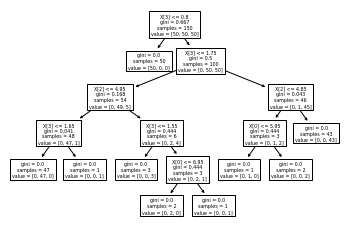

In [46]:
tree.plot_tree(clf) 

### Save decision tree as a PDF using graphviz

In [47]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("iris") 

'iris.pdf'

### Visualize decision tree classifier on Iris dataset using various dimensions

Automatically created module for IPython interactive environment


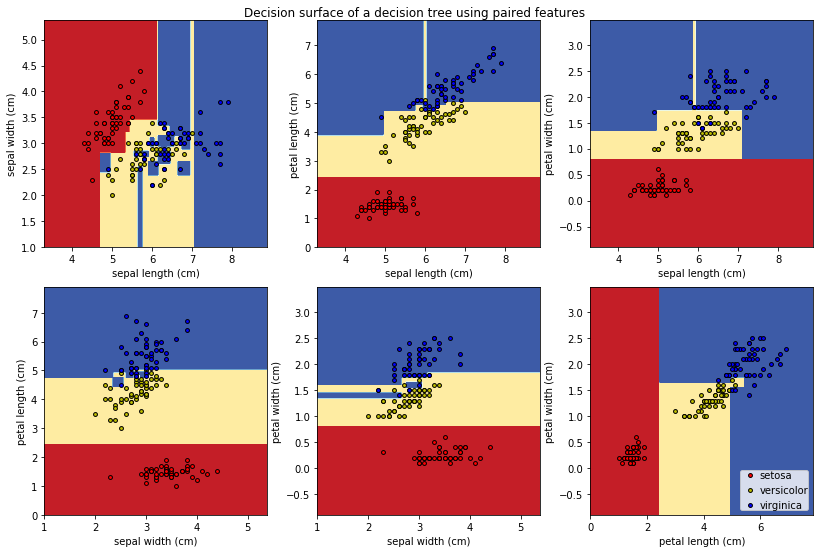

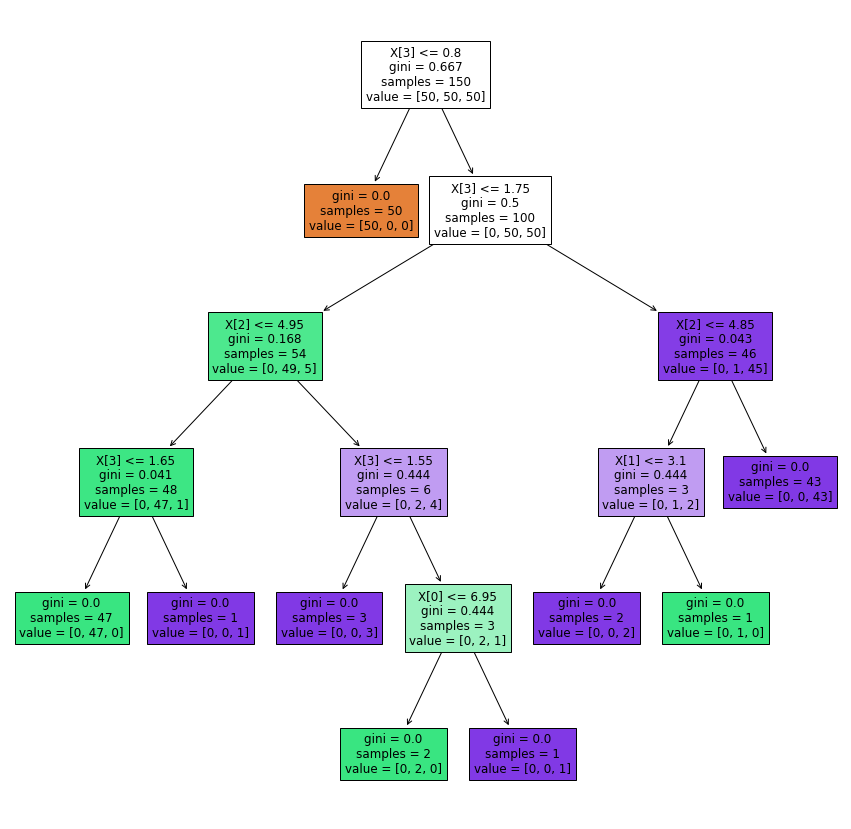

In [48]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Parameters
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02

# Load data
iris = load_iris()
plt.figure(figsize = (12,8))

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target

    # Train
    clf = DecisionTreeClassifier().fit(X, y)


# Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.RdYlBu, edgecolor='black', s=15)

plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis("tight")

plt.figure(figsize = (15,15))
clf = DecisionTreeClassifier().fit(iris.data, iris.target)
plot_tree(clf, filled=True)
plt.show()

# Implementing Bagging Classifier on Iris Dataset

Source: https://towardsdatascience.com/using-bagging-and-boosting-to-improve-classification-tree-accuracy-6d3bb6c95e5b

In [79]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [80]:
iris = load_iris()
X = iris.data[:,:2]  # we only take the first two features.
y = iris.target

print(X.shape)
print(y.shape)

(150, 2)
(150,)


In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

TreeAccuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:",TreeAccuracy)

Accuracy: 0.6222222222222222


In [82]:
res = []

for i in range(1,31):
    baglfy = BaggingClassifier(base_estimator=clf,n_estimators=i,
                max_samples=1.0)
    baglfy = baglfy.fit(X_train,y_train)

    y_pred = baglfy.predict(X_test)
    
    res.append(metrics.accuracy_score(y_test, y_pred))
    #print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

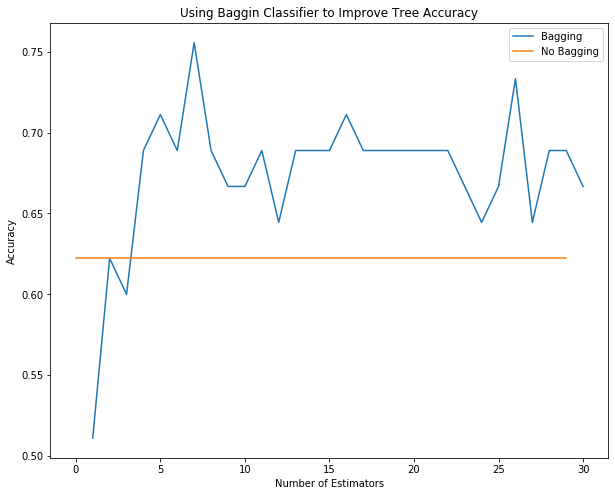

In [90]:
fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot(111)
plt.plot([i for i in range(1,31)], res)
plt.plot([i for i in range(30)], [TreeAccuracy]*30)
plt.title('Using Baggin Classifier to Improve Tree Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Number of Estimators')
ax.legend(['Bagging', 'No Bagging'])